# 1 - Input the data

In [399]:
# This CSV is separated by the "delimiter=;"
df = pd.read_csv('sleepdatavalues.csv',delimiter=";")
df

,Start,End,Sleep quality,Time in bed,weight,Distance1,Distance2
0,2024-04-10 22:57:49,2024-04-11 07:30:13,100%,8:32,52.6,344,379
1,2024-04-11 21:17:50,2024-04-12 21:33:54,3%,0:16,51.4,301,319
2,2024-04-12 22:42:49,2024-04-13 07:13:31,98%,8:30,51.6,356,370
3,2024-04-13 22:31:01,2024-04-14 06:03:01,65%,7:32,53.2,326,352
4,2024-04-14 22:12:10,2024-04-15 04:56:35,72%,6:44,52.2,376,392
5,2024-04-15 00:34:57,2024-04-16 07:47:23,83%,7:12,51.0,326,352
6,2024-04-16 00:23:06,2024-04-17 07:37:09,78%,7:14,52.9,378,389
7,2024-04-17 21:34:44,2024-04-18 04:53:34,78%,7:18,51.5,366,382
8,2024-04-18 21:32:25,2024-04-19 05:00:03,69%,7:27,53.7,333,366
9,2024-04-19 21:24:56,2024-04-20 05:00:02,74%,7:35,52.8,391,406


We notice that there are many missing data (NaN) in the CSV file. We need to find how many percentage of missing data there are.

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Start             887 non-null    object 
 1   End               887 non-null    object 
 2   Sleep quality     887 non-null    object 
 3   Time in bed       887 non-null    object 
 4   Wake up           246 non-null    object 
 5   Sleep Notes       652 non-null    object 
 6   Heart rate        162 non-null    float64
 7   Activity (steps)  887 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 55.6+ KB


In [359]:
import time
import datetime

df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# The feature "Time in bed" is counted from df['End'] - df['Start']. We can convert it with unit of seconds.

In [360]:
df['Time in bed'] = df['End'] - df['Start']
df['Time in bed'] = df['Time in bed'].astype('timedelta64[s]')

# The sleep quality need to be converted from *string* to *float* type

In [361]:
df['Sleep quality'] = df['Sleep quality'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(int)

I am intereted to the moment of falling down in the bed. For example,"2014-12-29 22:57:49" is "22:57:49", which is ***82669 second*** in a day (***95.68 %*** of a day - percentage in a day)

In [362]:
df['Start time'] = pd.Series([val.time() for val in df['Start']])
df['End time'] = pd.Series([val.time() for val in df['End']])

In [363]:
df['Start time in second'] = df['Start time'].apply(lambda x: (x.hour*60+x.minute)*60 + x.second)
df['End time in second'] = df['End time'].apply(lambda x: (x.hour*60+x.minute)*60 + x.second)

We can try to find the correlation between the features non-null

/tmp/ipykernel_3367/2692042498.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  r = sns.heatmap(df.corr(),cmap='Oranges')


Text(0.5, 1.0, 'Correlation')

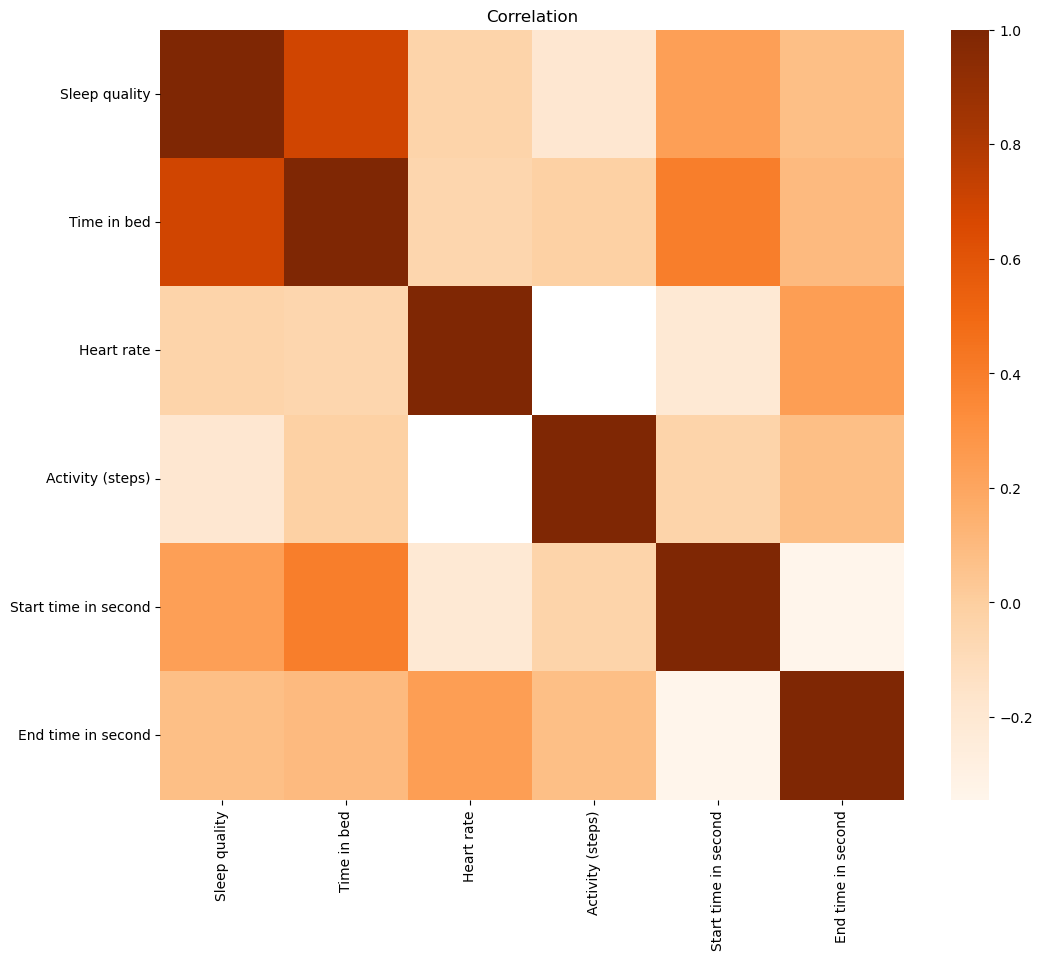

In [364]:
import matplotlib.pyplot as plt
# visualisation of this correlation
fig = plt.figure(figsize = (12,10))
r = sns.heatmap(df.corr(),cmap='Oranges')
# set title
r.set_title('Correlation')

# Let's check the correlations of features to the "sleep quality"

In [365]:
df.corr()['Sleep quality'].sort_values(ascending = False)

/tmp/ipykernel_3367/200473553.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Sleep quality'].sort_values(ascending = False)


Sleep quality           1.000000
Time in bed             0.695206
Start time in second    0.234936
End time in second      0.076523
Heart rate             -0.037846
Activity (steps)       -0.190491
Name: Sleep quality, dtype: float64

In [366]:
# So we can replace these symbols with positive and negative number 
# df['Wake up'] = df['Wake up'].replace({':)':2, ':|':1, ':(':0})

In [367]:
df2 = df[["Sleep quality", "Time in bed", "Start time in second", "End time in second"]]

In [368]:
# Drop the NaN elements
df2 = df2.dropna()

In [369]:
# convert the type from object to interger
# df2['Wake up'] = df2['Wake up'].astype('int')

In [370]:
# Let's check the correlations of features to the "sleep quality"
df2.corr()['Sleep quality'].sort_values(ascending = False)

Sleep quality           1.000000
Time in bed             0.695206
Start time in second    0.234936
End time in second      0.076523
Name: Sleep quality, dtype: float64

In [371]:
df3 = df[["Sleep quality","Time in bed", "Start time in second", "End time in second"]]

In [372]:
# Drop the NaN elements
df3 = df3.dropna()
# df3['Wake up'] = df3['Wake up'].astype('int')

In [373]:
# Let's check the correlations of features to the "sleep quality"
df3.corr()['Sleep quality'].sort_values(ascending = False)

Sleep quality           1.000000
Time in bed             0.695206
Start time in second    0.234936
End time in second      0.076523
Name: Sleep quality, dtype: float64

Text(0.5, 1.0, 'Correlation')

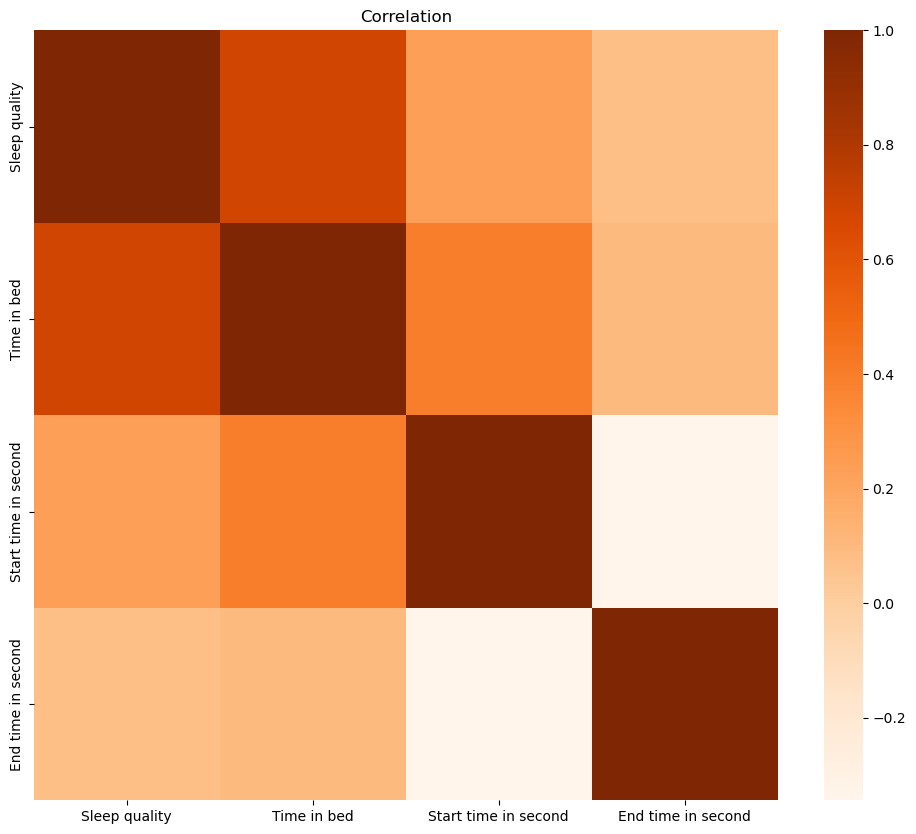

In [374]:
# visualisation of this correlation
fig = plt.figure(figsize = (12,10))
r = sns.heatmap(df3.corr(),cmap='Oranges')
# set title
r.set_title('Correlation')

## The "Sleep quality" is most affected by "Time in bed". 

# 2 - Explore Data Analysis

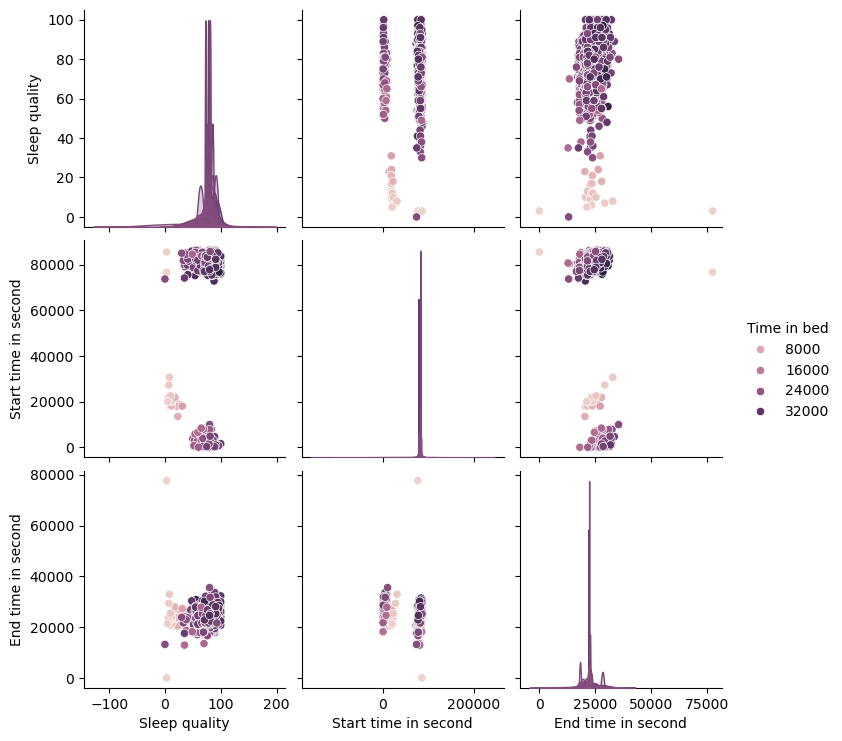

In [375]:
# Pairplot
sns.pairplot(df2, hue='Time in bed')

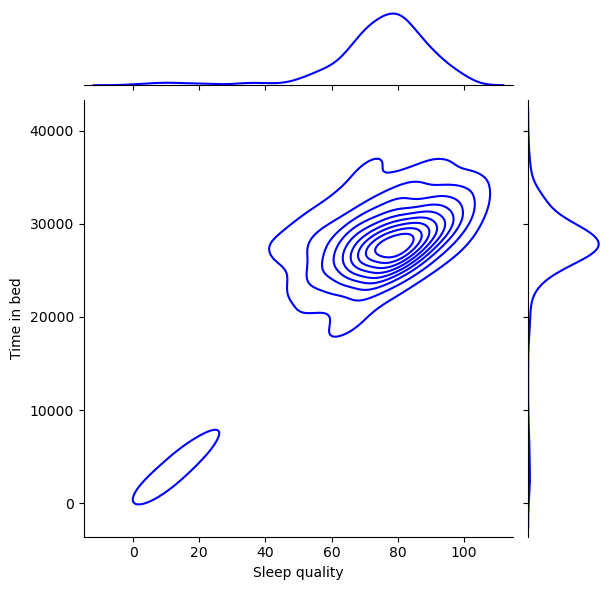

In [376]:
# Joint plot of features "Sleep quality" and "Time in bed" with unit second.
sns.jointplot(x='Sleep quality',y='Time in bed',data=df,color='blue',kind = 'kde')

In [377]:
# The average of "Time in bed"

print ('The average time in bed of these users is :', df['Time in bed'].mean(), 'second')
print ('The average time in bed of these users is :', df['Time in bed'].mean()/3600, 'hour')

The average time in bed of these users is : 27545.25479143179 second
The average time in bed of these users is : 7.651459664286609 hour


Text(0, 0.5, 'Count')

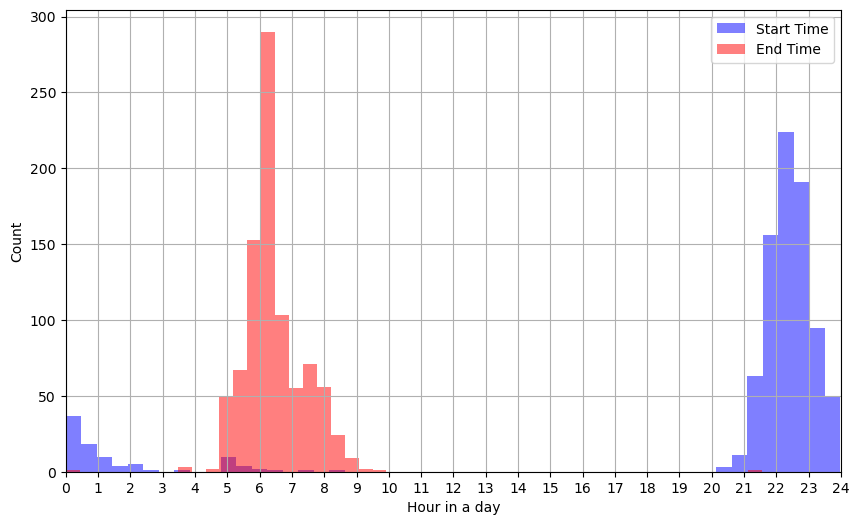

In [378]:
# The Histogram of Start time and End time
plt.figure(figsize=(10,6))
df['Start in hour'] = df['Start time in second'].apply(lambda x: x/3600)
df['End in hour'] = df['End time in second'].apply(lambda x: x/3600)
df['Start in hour'].hist(alpha=0.5,color='blue',label='Start Time',bins=50)
df['End in hour'].hist(alpha=0.5,color='red',label='End Time',bins=50)
plt.legend()
plt.xlim((0, 24)) 
plt.xticks(np.arange(0, 25, 1))
plt.xlabel('Hour in a day')
plt.ylabel('Count')

In [379]:
# Let's check the correlations of features to the "sleep quality"
df_new.corr()['Sleep quality'].sort_values(ascending = False)

/tmp/ipykernel_3367/1986945803.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new.corr()['Sleep quality'].sort_values(ascending = False)


Sleep quality           1.000000
Time in bed             0.647258
Start in hour           0.192031
Start time in second    0.192031
End time in second      0.163342
End in hour             0.163342
Activity (steps)       -0.136605
Wake up                      NaN
Heart rate                   NaN
Name: Sleep quality, dtype: float64

If we only look at the correlation between the "Sleep quality" and "Activity (steps)", they are not that related. According to experience, it is generally believed that a large amount of activity during the day will result in improved sleep quality. However, we didn't see that relation here.

# 3 - Machine Learning

## Train and test split

In [380]:
# We use features of "Time in bed","Start time in second", "End time in second" and "Activity (steps)" to predict the feature "Sleep quality"
# We choose to use df
X = df[['Time in bed', 'Start time in second','End time in second']].values
y = df['Sleep quality'].values

In [381]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [382]:
# In order to normalize the features, it is better to use MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 3.1 - LinearRegression Model

In [383]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)

print('test accuracy:', lm.score(X_test,y_test))

test accuracy: 0.4103236465935963


## 3.2 - KNN (K nearest neighbors) model

Text(0, 0.5, 'Error Rate')

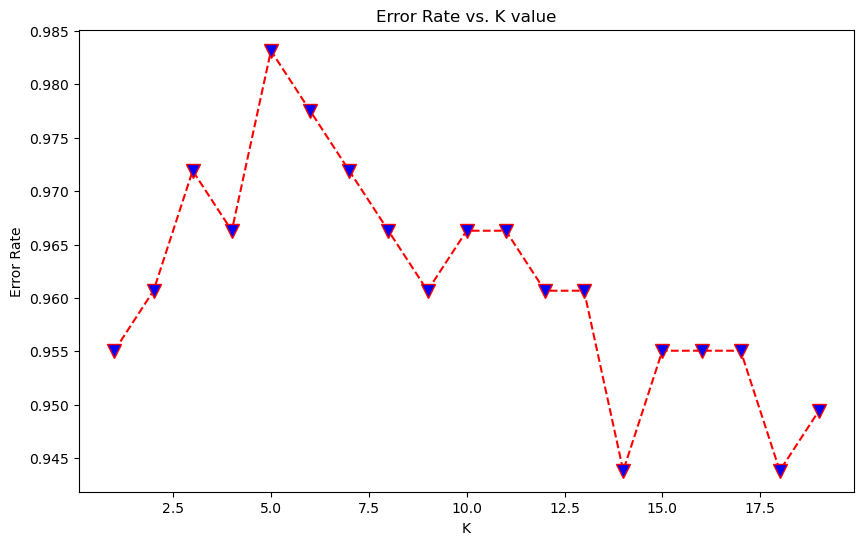

In [384]:
from sklearn.neighbors import KNeighborsClassifier

error_rate =[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate, color ='red',linestyle='dashed',marker='v',
        markerfacecolor = 'blue', markersize=10)
plt.title('Error Rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [385]:
knn = KNeighborsClassifier(n_neighbors=14) # why 5 is because of Elbow method
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [386]:
print('test accuracy:', knn.score(X_test,y_test))

test accuracy: 0.056179775280898875


## 3.3 - Logistic Regression Model

In [387]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
print('test accuracy:', logmodel.score(X_test,y_test))

test accuracy: 0.033707865168539325


## 3.4 - Decision Tree Model

In [388]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print('test accuracy:', dtree.score(X_test,y_test))

test accuracy: 0.05056179775280899


## 3.5 - Random Tree Model

In [389]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,y_train)
print('test accuracy:', rfc.score(X_test,y_test))

test accuracy: 0.05056179775280899


# 3.6 - Support Machine Vector (SVM) Algorithm

Support vector machines (SVMs) are a set of supervised machine learning methods used for classification, regression and outlier detection.

The advantages of support vector machines are :

• Effective in high dimentional spaces.
• Still effective in cases where number of dimensions is greater than the number of samples.
• Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
• Versatile: different kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines are : 

• If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial. 
• SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross validation. 

[source from site](https://scikit-learn.org/stable/modules/svm.html)



In [390]:
# First SVM model
from sklearn.svm import SVC
svm=SVC(random_state=101)
svm.fit(X_train, y_train)
print('train accuracy:', svm.score(X_train,y_train))
print('test accuracy:', svm.score(X_test,y_test))

train accuracy: 0.05782792665726375
test accuracy: 0.033707865168539325


# Reduce the unnecessary features to improve estimators' accuracy scores then apply gridsearch method

SelectKBest: removes all but the highest scoring features

For classification generally these methods are used: chi2, f_classif, mutual_info_classif

$\textbf{chi2}$: Computes chi-squared stats between each non-negative feature and class. This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

$\textbf{f_classif}$: Compute the ANOVA F-value for the provided sample.

$\textbf{mutual_info_classif}$: Estimates mutual information for a discrete target variable. Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

[source from site](https://scikit-learn.org/stable/modules/feature_selection.html)

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=4 is greater than n_features=3. All the features will be returned.
  warnings.warn(


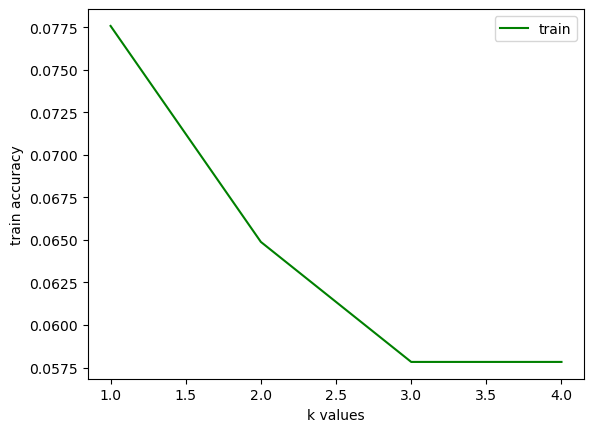

In [391]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
accuracy_list_train=[]
k=np.arange(1,5,1)
for each in k:
    x_new = SelectKBest(f_classif, k = each).fit_transform(X_train,y_train)
    svm.fit(x_new, y_train)
    accuracy_list_train.append(svm.score(x_new,y_train))
    
plt.plot(k, accuracy_list_train, color='green', label='train')
plt.xlabel('k values')
plt.ylabel('train accuracy')
plt.legend()
plt.show()

In [392]:
d = {'best features number': k, 'train_score': accuracy_list_train}
df3 = pd.DataFrame(data=d)
print ('max accuracy:', df3['train_score'].max())
print ('max accuracy id:', df3['train_score'].idxmax())

max accuracy: 0.07757404795486601
max accuracy id: 0


In [393]:
# To sum up,
print ('Using the normalisation preprocessing: \n'
    'Linear Regresion Model precision:',lm.score(X_test,y_test),'\n',
    'KNN Model precision:', knn.score(X_test,y_test),'\n',
      'Logistic Regression Model precision:',logmodel.score(X_test,y_test),'\n',
      'Decision Tree Model precision:', dtree.score(X_test,y_test),'\n',
      'Random Tree Model precision:', rfc.score(X_test,y_test),'\n',
      'Support Machine Vector precision:', svm.score(X_test,y_test))

Using the normalisation preprocessing: 
Linear Regresion Model precision: 0.4103236465935963 
 KNN Model precision: 0.056179775280898875 
 Logistic Regression Model precision: 0.033707865168539325 
 Decision Tree Model precision: 0.05056179775280899 
 Random Tree Model precision: 0.05056179775280899 
 Support Machine Vector precision: 0.033707865168539325


In [ ]:
import sagemaker, boto3, os
bucket = sagemaker.Session().default_bucket()
prefix = "demo-sagemaker-Sleep-analysis"

boto3.Session().resource('s3').Bucket(bucket).Object(
    os.path.join(prefix, 'sleepdata.csv')).upload_file('sleepdata.csv')
# boto3.Session().resource('s3').Bucket(bucket).Object(
#     os.path.join(prefix, 'data/validation.csv')).upload_file('validation.csv')